In [1]:
import numpy as np 
from ecg_base import generateBaseEcg 

In [2]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [3]:
A = [[-0.313,	-4.680,	1.057,	-0.500,	0.345],
    [0.373	,4.726	,0.690	,0.228	,-0.223]]
T = [[282.660,	87.180,	30.640,	11.120,	177.252],
     [264.160,	88.000,	15.400,	1.000,	248.027]]
S = [[	43.672,	19.990,	14.110,	18.060,	92.944],
        [50.571,	20.580,	14.110,	5.676,	46.880]]
Lengths = [300,88,48,77,429]
C = [[0.011,-0.04,-0.27,0.017,-0.001],
     [0,0,0,0,0]]


In [4]:
signal = generateBaseEcg(Lengths,A,T,S,C)


In [5]:
print(signal.shape)
signal1 = smooth(signal,10)
print(signal1.shape)

(670,)
(670,)


/home/wicia/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


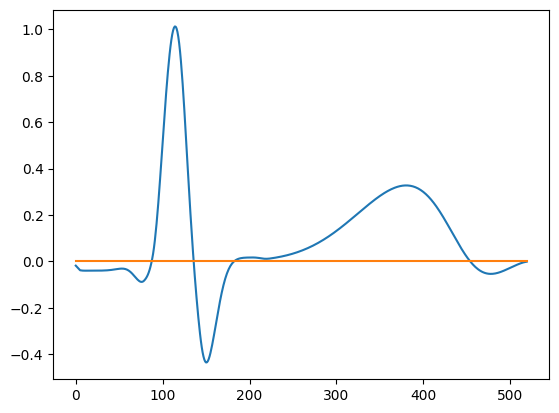

In [6]:
import matplotlib.pyplot as plt 
plt.plot(smooth(signal[150:820],10))
plt.plot(np.zeros(len(signal[150:820])))
# plt.plot(signal1)
plt.show()

In [7]:
sp = smooth(signal[150:820],10)

In [8]:
tp = np.linspace(0,0.6,len(sp))

In [9]:
t = np.linspace(0,0.6,round(0.6*256))

In [10]:
s = np.interp(t,tp,sp)

In [12]:
def addFlat(signal,hearthRate,samplingRate):
    tp = np.linspace(0,0.6,len(signal))
    t = np.linspace(0,0.6,round(0.6*samplingRate))
    s = np.interp(t,tp,signal)

    oneBeatPeriod = 1/(hearthRate/60)
    flatPeriod = oneBeatPeriod - 0.6
    if flatPeriod >=0 : 
        tp = np.linspace(0,0.6,len(signal))
        t = np.linspace(0,0.6,round(0.6*samplingRate))
        s = np.interp(t,tp,signal)
        zeros = np.zeros(round(flatPeriod*samplingRate))
        signalAppended = np.append(s,zeros)
    else :
        tp = np.linspace(0,oneBeatPeriod,len(signal))
        t = np.linspace(0,oneBeatPeriod,round(oneBeatPeriod*samplingRate))
        s = np.interp(t,tp,signal)
        signalAppended = s
    return signalAppended

def calculateTime(signal, samplingRate):
    time = np.linspace(0,len(signal)/samplingRate,len(signal))
    return time

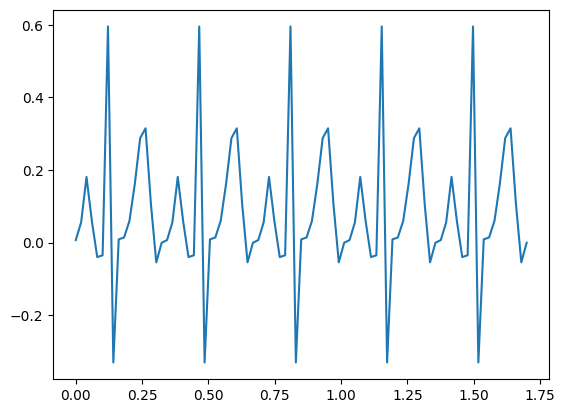

In [17]:
sr = 50
hr = 180
s1 = addFlat(signal,hr,sr)
s5 = np.concatenate([s1 for i in range(5)])
t5 = calculateTime(s5,sr)
plt.plot(t5,s5)

In [18]:
def createMultiplePeriods(periods,hearthRate,samplingRate):
    A = [[-0.313,	-4.680,	1.057,	-0.500,	0.345],
    [0.373	,4.726	,0.690	,0.228	,-0.223]]
    T = [[282.660,	87.180,	30.640,	11.120,	177.252],
        [264.160,	88.000,	15.400,	1.000,	248.027]]
    S = [[	43.672,	19.990,	14.110,	18.060,	92.944],
            [50.571,	20.580,	14.110,	5.676,	46.880]]
    Lengths = [300,88,48,77,429]
    C = [[0.011,-0.04,-0.27,0.017,-0.001],
        [0,0,0,0,0]]
    
    signal = generateBaseEcg(Lengths,A,T,S,C)
    s = addFlat(signal,hearthRate,samplingRate)
    sOut = np.concatenate([s for i in range(periods)])
    tOut = calculateTime(sOut,samplingRate)
    return tOut,sOut
    


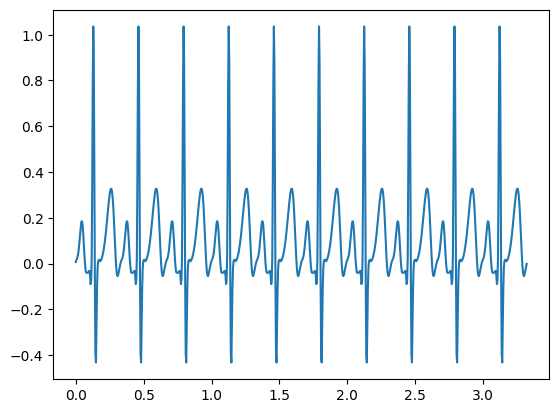

In [24]:
t,s = createMultiplePeriods(10,180,256)
plt.plot(t,s)

In [50]:
def createEcg(maxTime,hearthRate=60,samplingRate=256,networkNoise = 0,noise = 0,breathFreq = 0.2,breathAmplitude = 0):
    A = [[-0.313,	-4.680,	1.057,	-0.500,	0.345],
    [0.373	,4.726	,0.690	,0.228	,-0.223]]
    T = [[282.660,	87.180,	30.640,	11.120,	177.252],
        [264.160,	88.000,	15.400,	1.000,	248.027]]
    S = [[	43.672,	19.990,	14.110,	18.060,	92.944],
            [50.571,	20.580,	14.110,	5.676,	46.880]]
    Lengths = [300,88,48,77,429]
    C = [[0.011,-0.04,-0.27,0.017,-0.001],
        [0,0,0,0,0]]
    
    signal = generateBaseEcg(Lengths,A,T,S,C)
    s = addFlat(signal,hearthRate,samplingRate)
    sOut = s
    tOut = calculateTime(sOut,samplingRate)
    while tOut[-1] < maxTime :
        sOut = np.concatenate([sOut,s])
        tOut = calculateTime(sOut,samplingRate)
    while tOut[-1] > maxTime:
        tOut = tOut[:-1]
        sOut = sOut[:-1]

    if networkNoise >0 :
        sOut = sOut + networkNoise*np.sin(2*np.pi*50*tOut)
    if noise >0 :
        sOut = sOut + np.random.random(len(sOut))*noise
    if breathAmplitude >0:
        sOut = sOut + np.sin(2*np.pi*breathFreq*tOut)*breathAmplitude
    
    return tOut,sOut



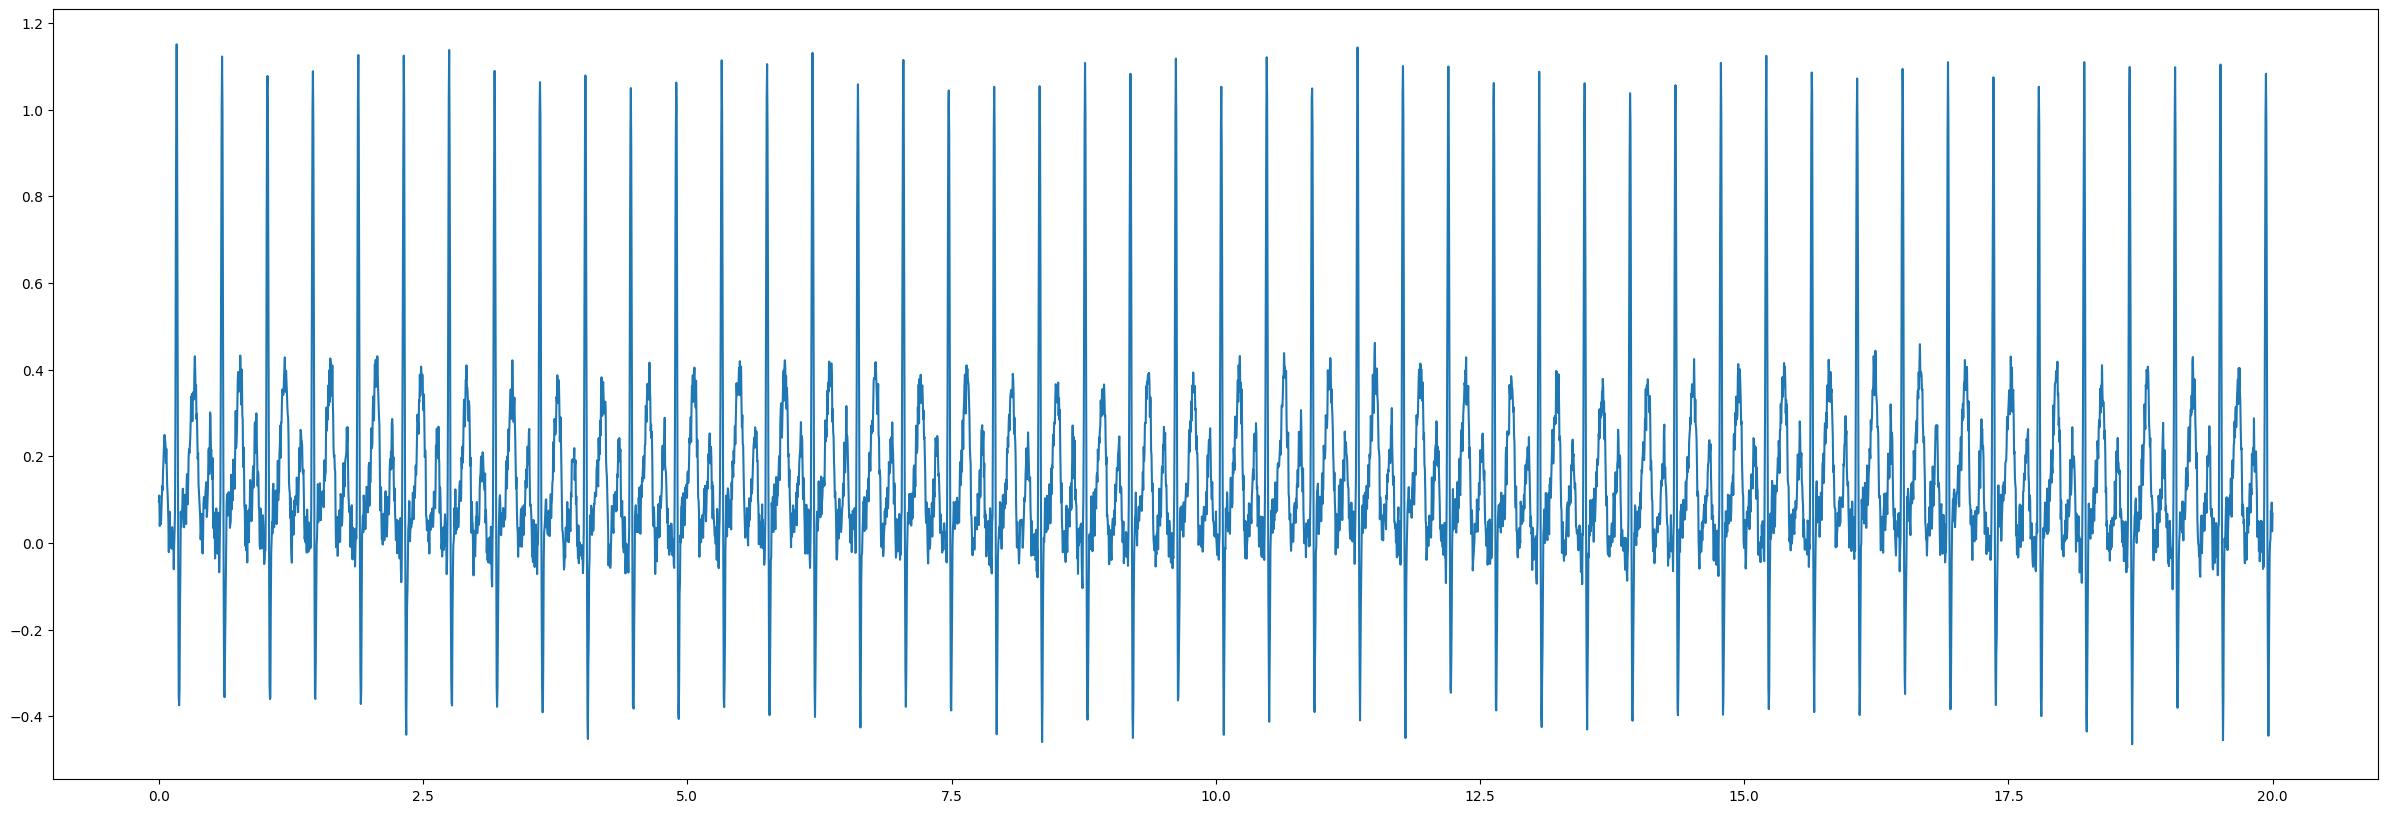

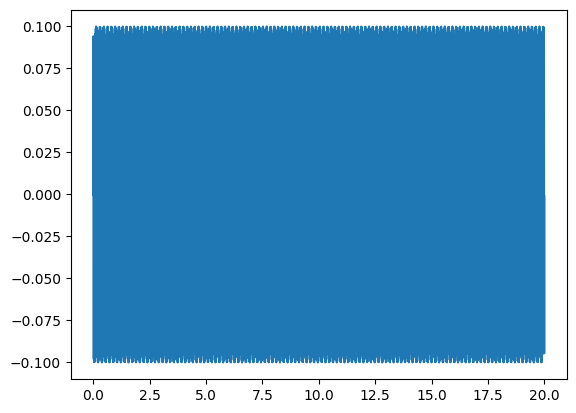

In [64]:

t,s = createEcg(20,140,256,networkNoise=0.02,noise = 0.1,breathAmplitude=0.02)
plt.figure(figsize=(30,10))
plt.plot(t,s)
plt.show()
plt.plot(t,0.1*np.sin(2*np.pi*50*t))